# Hovmoller plot of absolute vorticity

In [1]:
import os
import sys
sys.path.append('../..')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr
import cmocean
import cimf as c

In [2]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.cursive'] = ['Helvetica-Oblique']
plt.rcParams['pdf.fonttype'] = 42

In [3]:
ds = xr.open_dataset("figdata2.nc")

/var/folders/x5/29t2fzws2dn4xtmh2gmjdgwr0000gp/T/ipykernel_27838/3121955637.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=26)


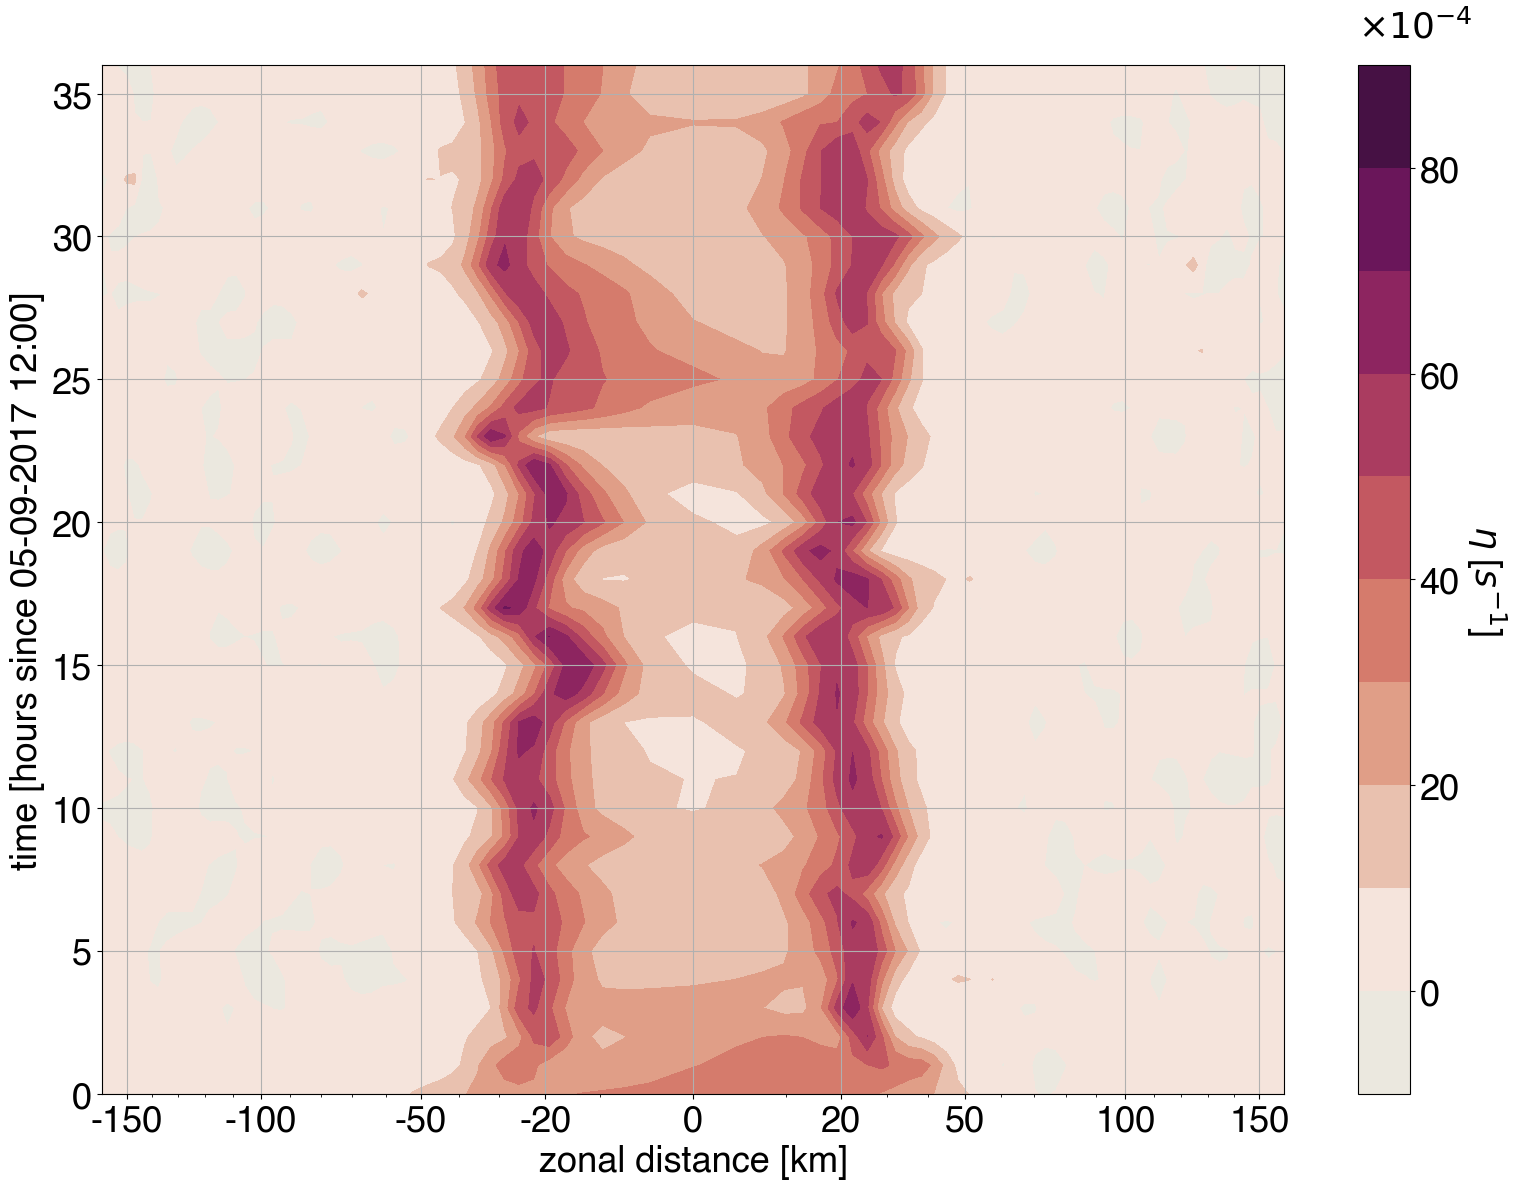

In [4]:
fig = plt.figure(figsize=(16,12))
xticks = np.array([-150,-100,-50,-20,0,20,50,100,150])
xminorticks = np.arange(-150,151,10)
Zlevels = np.arange(-0.001,0.0091,0.001)
Z = ds.sel(p=slice(50000,90000),dy=0, dx=slice(-50,50)).eta.mean('p')
t = (Z.valid_time-Z.valid_time[0])/3.6e12
p1 = plt.contourf(Z.r*np.sign(Z.dx), 
                  #Z.valid_time.expand_dims({'dx':len(Z.dx)},1), 
                  t.expand_dims({'dx':len(Z.dx)},1),
                  Z, 
                  cmap=cmocean.cm.curl, levels=Zlevels, norm=colors.CenteredNorm())
ax = p1.axes
cb = plt.colorbar(p1, ticks=Zlevels[1::2])
cb.ax.set_yticklabels([f'{l*1e4:.0f}' for l in cb.get_ticks()], fontsize=26)
cbtitle = cb.ax.set_title(r'$\times 10^{-4}$',fontsize=26, pad=20)
cbtitle.set_x(1.1)
cb.ax.set_ylabel(r'$\eta$ [$s^{-1}$]', fontsize=26, rotation=270, labelpad=35)
xscale = 1.5
ax.set_xscale('function', functions=(lambda x: np.sign(x)*np.abs(x)**(1/xscale), lambda x: np.sign(x)*np.abs(x)**(xscale)))
ax.grid()
ax.set_xticks(xticks*1000, labels=xticks, fontsize=26)
_=ax.set_xticks(xminorticks*1000, minor=True)
#yticklabels = ax.get_yticklabels()
ax.set_yticklabels(ax.get_yticklabels(), fontsize=26)
# for i,ytick in enumerate(ax.get_yticks()):
#     dt = np.datetime64(int(ytick*86400),'s').item()
#     yticklabels[i] = f'{dt.day:d}-{dt.month:d} {dt.hour:02d}:00' if dt.hour==0 else f'{dt.hour:02d}:00'
# ax.set_yticklabels(yticklabels, fontsize=26)
plt.xlabel('zonal distance [km]', fontsize=26)
plt.ylabel('time [hours since 05-09-2017 12:00]', fontsize=26, labelpad=5)
#plt.title('500-900hPa mean absolute vorticity along zonal cross section',fontsize=24, pad=20)
plt.tight_layout()
#fig.savefig("eta_500-900hPa-mean_crosstime4.png", dpi=300, bbox_inches='tight')


In [5]:
dsm,_ = c.azimean(ds)

22:00:18: azimean()
22:00:18: toPolar()
22:00:18: distance()
22:00:18: convert_wind()
22:00:18: convert_wind(): using existing u_rad and v_tan
22:00:18: azimean: vorticity_flux()
22:00:18: vorticity_flux()
22:00:18: Calculating dthetadt with (slightly) misaligned dp and sigma.
22:00:18: calc_dp(ds)
22:00:18: azimean: not calculating vorticity flux
22:00:18: azimean_gufunc()
22:00:20: removing ['dy', 'dx'] from azimuthal mean dataset


/var/folders/x5/29t2fzws2dn4xtmh2gmjdgwr0000gp/T/ipykernel_27838/725162912.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=FSIZE)
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


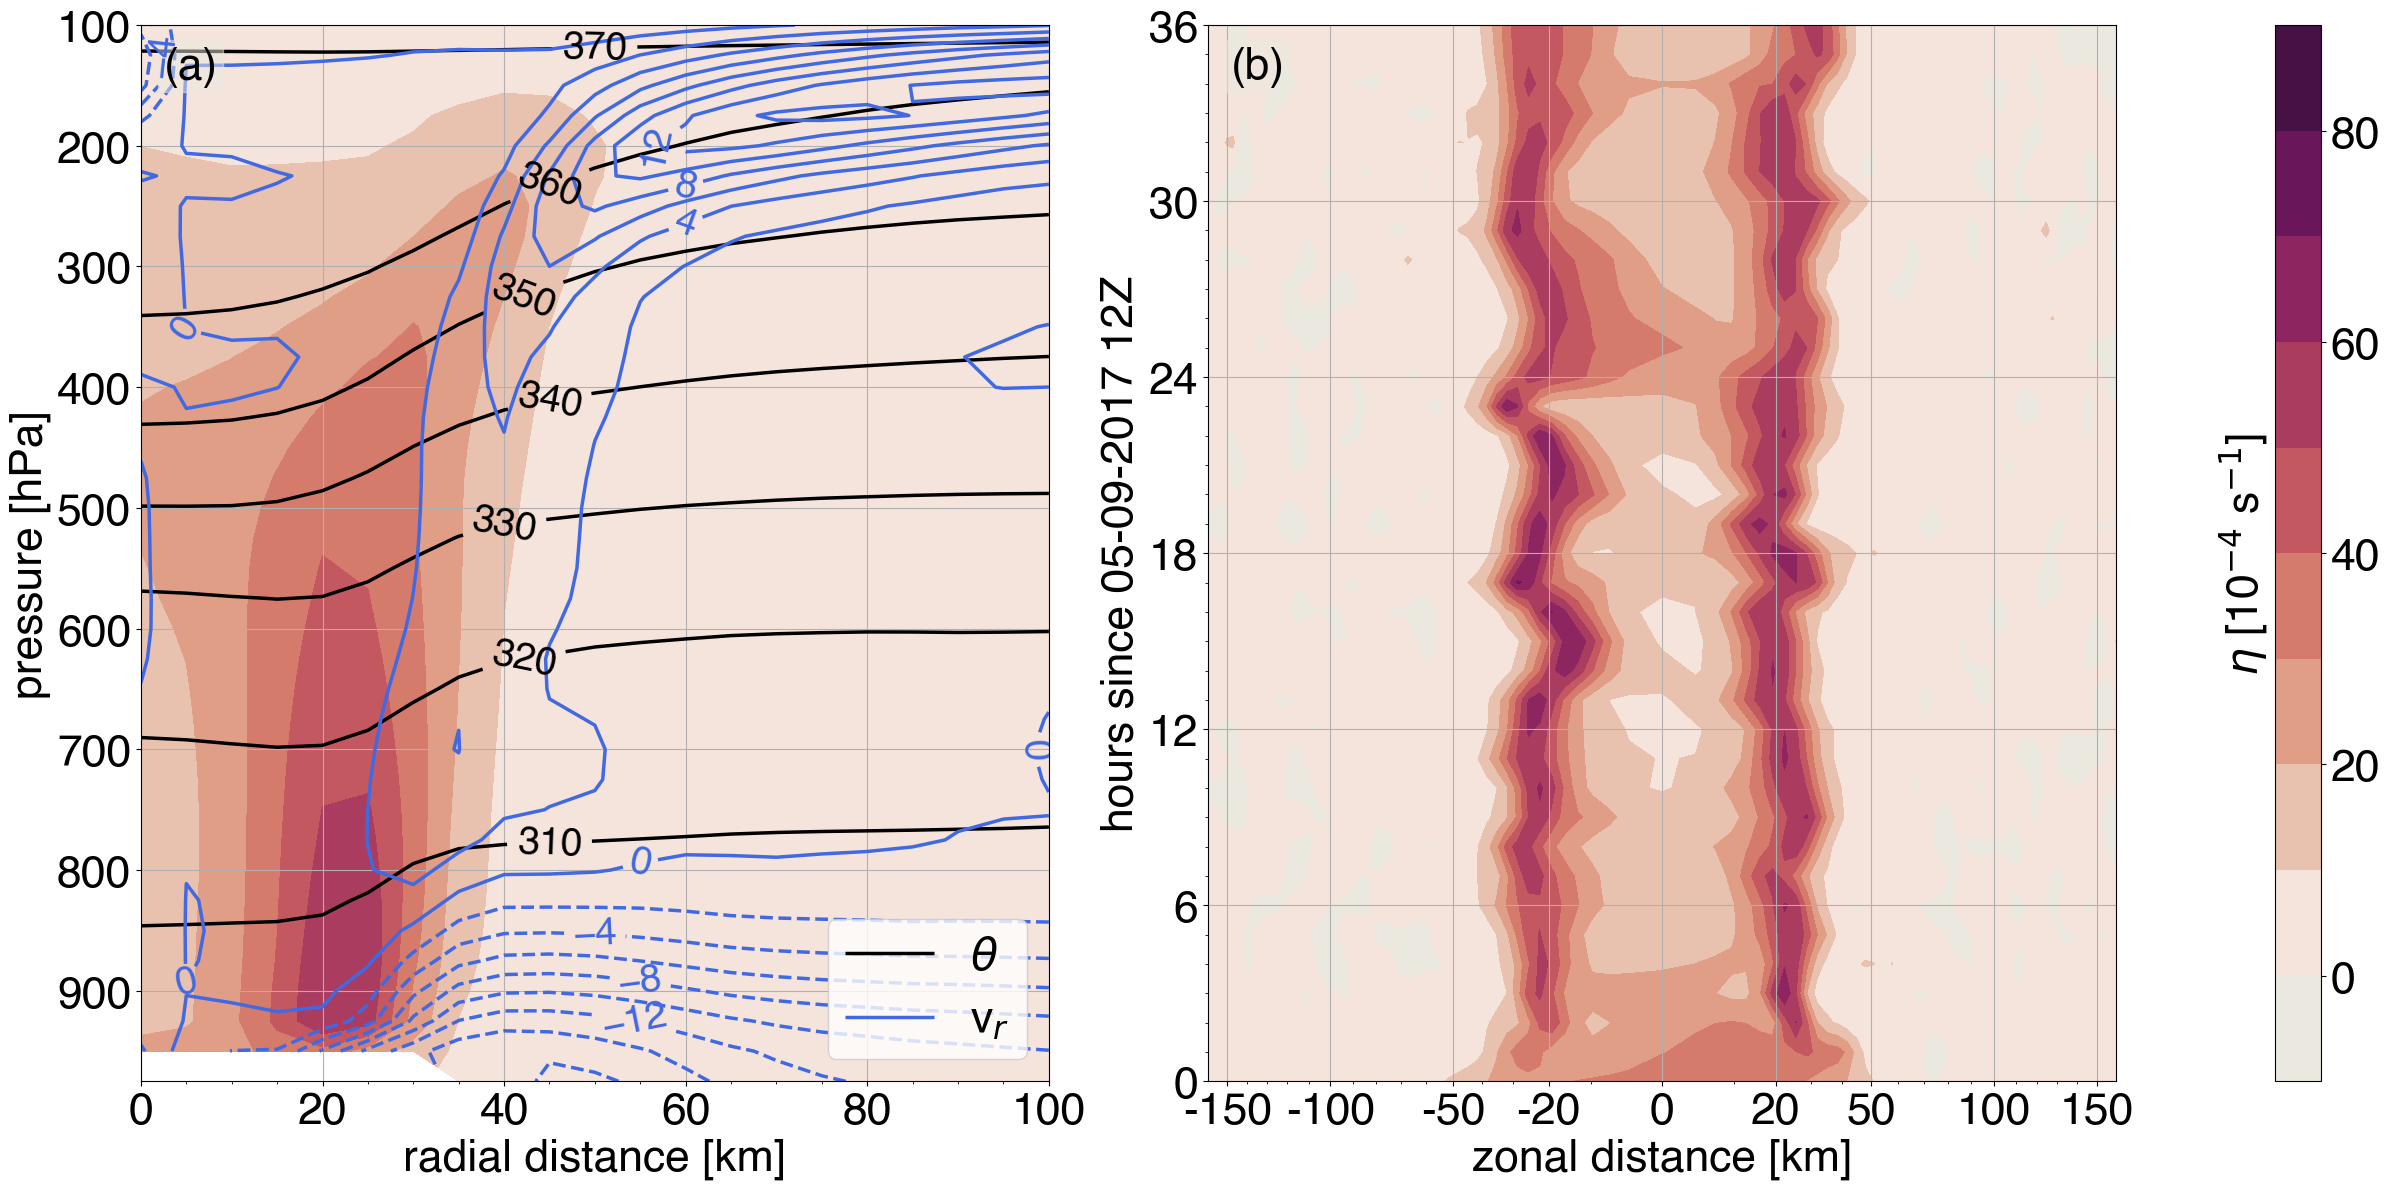

In [8]:
FSIZE = 32 # general font size

fig,ax = plt.subplots(1,3,figsize=(24,12), width_ratios=[10,10,0.5])

#------------------- prepare data -----------------------
ds12 = dsm.mean('valid_time').sel(r=slice(0,100000),p=slice(10000,97500)).transpose('p','r')
Z1 = ds.sel(p=slice(50000,90000),dy=0, dx=slice(-50,50)).eta.mean('p')
t = (Z.valid_time-Z.valid_time[0])/3.6e12
Zlevels = np.arange(-0.001,0.0091,0.001)  # absolute vorticity levels
Tlevels = np.arange(290,400,10)  # potential temperature levels
Ulevels = np.linspace(-20,20,21)

#======================== Plot 1 ========================
p01 = ax[0].contourf(ds12.r/1000, ds12.p/100, ds12.eta,cmap=cmocean.cm.curl, levels=Zlevels, norm=colors.CenteredNorm())
p02 = ax[0].contour(ds12.r/1000, ds12.p/100, ds12.theta, colors='k', levels=Tlevels, linewidths=2.5)
p03 = ax[0].contour(ds12.r/1000, ds12.p/100, ds12.u_rad, colors='royalblue', levels=Ulevels, linewidths=2.5)
c02 = ax[0].clabel(p02, fontsize=int(0.9*FSIZE), inline=True)
c03 = ax[0].clabel(p03, fontsize=int(0.9*FSIZE), levels=Ulevels[::2])
h02 = p02.legend_elements()[0][0]
h03 = p03.legend_elements()[0][-1]
l0 = ax[0].legend([h02,h03],[r'$\theta$',r'v$_r$'],fontsize=FSIZE, loc='lower right')
ax[0].invert_yaxis()
t0 = ax[0].annotate('(a)',(0.025,0.95),xycoords='axes fraction', fontsize=FSIZE)

#======================== Plot 2 ========================
p1 = ax[1].contourf(Z1.r*np.sign(Z1.dx), t.expand_dims({'dx':len(Z1.dx)},1),Z1, 
                  cmap=cmocean.cm.curl, levels=Zlevels, norm=colors.CenteredNorm())
t1 = ax[1].annotate('(b)',(0.025,0.95),xycoords='axes fraction', fontsize=FSIZE)

#------------------- ticks -----------------------
xticks0 = np.arange(0,101,20)
xminorticks0 = np.arange(0,101,5)
ax[0].set_xticks(xticks0,labels=xticks0,fontsize=FSIZE)
ax[0].set_xticks(xminorticks0, minor=True)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=FSIZE)
ax[0].grid()

xscale = 1.5
xticks = np.array([-150,-100,-50,-20,0,20,50,100,150])
yticks = np.arange(0,37,6)
xminorticks = np.arange(-150,151,10)
yminorticks = np.arange(0,37,1)
ax[1].set_xscale('function', functions=(lambda x: np.sign(x)*np.abs(x)**(1/xscale), lambda x: np.sign(x)*np.abs(x)**(xscale)))
ax[1].set_xticks(xticks*1000, labels=xticks, fontsize=FSIZE)
ax[1].set_xticks(xminorticks*1000, minor=True)
ax[1].set_yticks(yticks, labels=yticks, fontsize=FSIZE)
ax[1].set_yticks(yminorticks, minor=True)
ax[1].grid()

#------------------ labels ----------------------------
ax[0].set_xlabel('radial distance [km]', fontsize=FSIZE)
ax[0].set_ylabel('pressure [hPa]',fontsize=FSIZE)
ax[1].set_xlabel('zonal distance [km]', fontsize=FSIZE)
ax[1].set_ylabel('hours since 05-09-2017 12Z', fontsize=FSIZE, labelpad=5)

#------------------ colorbar ----------------------------
cb = plt.colorbar(p1, cax=ax[2], ticks=Zlevels[1::2])
cb.ax.yaxis.set_label_position('left')
cb.ax.set_yticks(cb.get_ticks(),labels=[f'{l*1e4:.0f}' for l in cb.get_ticks()], fontsize=FSIZE)
cbtitle.set_x(1.1)
cb.ax.set_ylabel(r'$\eta$ [10$^{-4}$ s$^{-1}$]', fontsize=FSIZE)

#------------ fancy color of annotations -----------
color = cb.cmap(cb.norm(cb.values[0]))
t0.set_bbox(dict(facecolor=color, alpha=0.5, edgecolor=color))
t1.set_bbox(dict(facecolor=color, alpha=0.5, edgecolor=color))

#------------------- save -------------------
fig.tight_layout()
fig.savefig("eta_500-900hPa-mean_crosstime5.pdf", format='pdf', dpi=300, bbox_inches='tight')

### Previous versions (no need to run)

In [ ]:
fig = plt.figure(figsize=(16,12))
xticks = np.array([-150,-100,-50,-20,0,20,50,100,150])
xminorticks = np.arange(-150,151,10)
Zlevels = np.arange(-0.001,0.0091,0.001)
Z = ds2.sel(p=slice(50000,90000),dy=0, dx=slice(-50,50)).eta.mean('p')
p1 = plt.contourf(Z.r*np.sign(Z.dx), Z.valid_time.expand_dims({'dx':len(Z.dx)},1), Z, 
                  cmap=cmocean.cm.curl, levels=Zlevels, norm=colors.CenteredNorm())
ax = p1.axes
cb = plt.colorbar(p1, ticks=Zlevels[1::2])
cb.ax.set_yticklabels([f'{l*1e4:.0f}' for l in cb.get_ticks()], fontsize=26)
cbtitle = cb.ax.set_title(r'$\cdot 10^{-4}\,s^{-1}$',fontsize=26, pad=20)
cbtitle.set_x(1.1)
xscale = 1.5
ax.set_xscale('function', functions=(lambda x: np.sign(x)*np.abs(x)**(1/xscale), lambda x: np.sign(x)*np.abs(x)**(xscale)))
ax.grid()
ax.set_xticks(xticks*1000, labels=xticks, fontsize=26)
_=ax.set_xticks(xminorticks*1000, minor=True)
yticklabels = ax.get_yticklabels()
for i,ytick in enumerate(ax.get_yticks()):
    dt = np.datetime64(int(ytick*86400),'s').item()
    yticklabels[i] = f'{dt.day:d}-{dt.month:d} {dt.hour:02d}:00' if dt.hour==0 else f'{dt.hour:02d}:00'
ax.set_yticklabels(yticklabels, fontsize=26)
plt.xlabel('zonal distance [km]', fontsize=26)
plt.ylabel('time', fontsize=26, labelpad=-20)
#plt.title('500-900hPa mean absolute vorticity along zonal cross section',fontsize=24, pad=20)
plt.tight_layout()
fig.savefig("fig/eta_500-900hPa-mean_crosstime2.png", dpi=300, bbox_inches='tight')